## Load face detector

In [1]:
import numpy as np
import cv2

In [2]:
def mask_classifier(img, net, face_mask_classifier):    
    ## get heigh and width
    h, w = img.shape[0], img.shape[1]

    ## construct a blob of the image for the net
    blob = cv2.dnn.blobFromImage(img,
                                 1.0,
                                 (300, 300),
                                 (104.0, 177.0, 123.0))

    ## pass the blob through the net
    net.setInput(blob)
    detections = net.forward()

    if detections.shape[2] > 0: 
        ## loop in the detections
        for i in range(0, detections.shape[2]):
            ## extract the confidence
            confidence = detections[0, 0, i, 2]

            ## greater the minimun confidence
            if confidence > 0.8:
                ## get the coordinates for bounding box
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                start_x, start_y, end_x, end_y = box.astype("int")

                ## ensure the boundig box
                start_x, start_y = max(0, start_x), max(0, start_y)
                end_x, end_y = min(w-1, end_x), min(h-1, end_y)

                ## extract the face ROI
                face = img[start_y:end_y, start_x:end_x]
                #face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
                face = cv2.resize(face, (224, 224))
                face = img_to_array(face)
                face = preprocess_input(face)
                face = np.expand_dims(face, axis=0)

                # pass the face through the model to determine if the face
                # has a mask or not
                (mask, withoutMask) = face_mask_classifier.predict(face)[0]

                # determine the class label and color we'll use to draw
                # the bounding box and text
                label = "Mask" if mask > withoutMask else "No Mask"
                color = (0, 255, 0) if label == "Mask" else (255, 0, 0)
                # include the probability in the label
                label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
                # display the label and bounding box rectangle on the output
                # frame
                cv2.putText(img, label, (start_x, start_y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
                cv2.rectangle(img, (start_x, start_y), (end_x, end_y), color, 2)

    return img

In [3]:
## get the architecture and weights of the model
proto = "face_detector/deploy.prototxt"
weights = "face_detector/res10_300x300_ssd_iter_140000.caffemodel"

## load model using opencv
net = cv2.dnn.readNet(proto, weights)
net

<dnn_Net 0x7f6bc467b650>

## Load face mask classifier model

In [4]:
# import the necessary packages
from tensorflow.keras.models import load_model

In [5]:
face_mask_classifier = load_model("face_mask_classifier")
#face_mask_classifier.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## With images

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

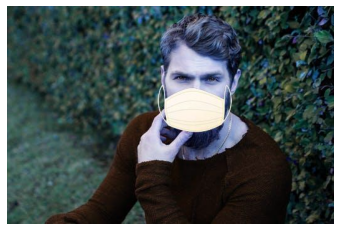

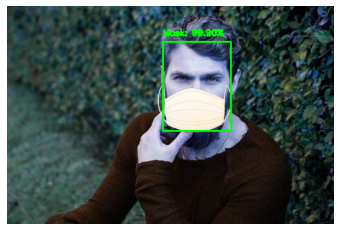

In [7]:
## read random image
img = cv2.imread("dataset/with_mask/0-with-mask.jpg")
plt.axis("off")
plt.imshow(img)
plt.show()

img_ = mask_classifier(img, net, face_mask_classifier)

plt.axis("off")
plt.imshow(img_)
plt.show()

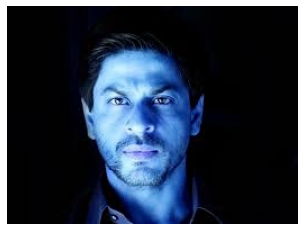

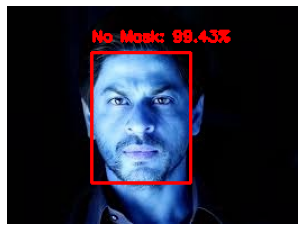

In [8]:
## read random image
img = cv2.imread("dataset/without_mask/137.jpg")
plt.axis("off")
plt.imshow(img)
plt.show()

img_ = mask_classifier(img, net, face_mask_classifier)

plt.axis("off")
plt.imshow(img_)
plt.show()

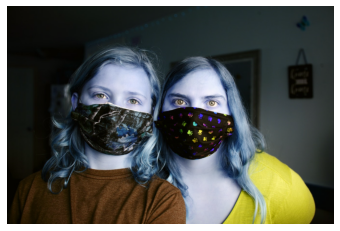

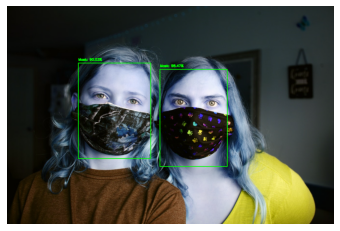

True

In [18]:
## read random image
img = cv2.imread("person_with_mask.jpeg")
plt.axis("off")
plt.imshow(img)
plt.show()

img_ = mask_classifier(img, net, face_mask_classifier)

plt.axis("off")
plt.imshow(img_)
plt.show()

cv2.imwrite("example_classified.jpg", img_)

## With Camera

In [9]:
## get camera
video_capture = cv2.VideoCapture(0)

while video_capture.isOpened():
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    
    ## get heigh and width
    h, w = frame.shape[0], frame.shape[1]

    ## construct a blob of the image for the net
    blob = cv2.dnn.blobFromImage(frame,
                                 1.0,
                                 (300, 300),
                                 (104.0, 177.0, 123.0))

    ## pass the blob through the net
    net.setInput(blob)
    detections = net.forward()

    ## loop in the detections
    for i in range(0, detections.shape[2]):
        ## extract the confidence
        confidence = detections[0, 0, i, 2]

        ## greater the minimun confidence
        if confidence > 0.8:
            ## get the coordinates for bounding box
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            start_x, start_y, end_x, end_y = box.astype("int")

            ## ensure the boundig box
            start_x, start_y = max(0, start_x), max(0, start_y)
            end_x, end_y = min(w-1, end_x), min(h-1, end_y)

            ## extract the face ROI
            face = frame[start_y:end_y, start_x:end_x]
            #face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)
            face = np.expand_dims(face, axis=0)

            # pass the face through the model to determine if the qqqqqqq
            # has a mask or not
            (mask, withoutMask) = face_mask_classifier.predict(face)[0]
            
            if max(mask, withoutMask) > 0.8:                
                # determine the class label and color we'll use to draw
                # the bounding box and text
                label = "Mask" if mask > withoutMask else "No Mask"
                color = (0, 255, 0) if label == "Mask" else (255, 0, 0)
                # include the probability in the label
                label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
                # display the label and bounding box rectangle on the output
                # frame
                cv2.putText(frame, label, (start_x, start_y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
                cv2.rectangle(frame, (start_x, start_y), (end_x, end_y), color, 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
                
##When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()